# CREDIT SCORING MODEL

This work aim to develop a credit scoring model to predict the wether a loan applicant will repay or default loan. The logistic regression, Decision Tree and Random Forest models were tested to determine the best performing model.

## PROBLEM IDENTIFICATION

A company is currently in process of giving out loans to varied types of individuals. In order to determine the client paying back the loan in full and on-time, develop a credit scoring model that takes into account the behavioural traits of a loan applicant in accessing his ability in repaying the loan granted.

## TASK

Credit a model to predict cusotmers who are likely to repay or default loan

### DATA PREPARATION AND VALIDATION

Data for this work is sourced from Kaggle Credit Scoring model named HMEQ.
The dataset consist of 5960 rows and 12 columns.

In [1]:
#Importing required libraries
from sklearn.model_selection import StratifiedKFold
import itertools
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Importing Data from local computer
Data = pd.read_csv(r'C:\\Users\\User\\Desktop\\Data Analysis\\ML PROJECT\\Data\\Credit_Score.csv')
Alt_Data =  pd.read_csv(r'C:\\Users\\User\\Desktop\\Data Analysis\\ML PROJECT\\Data\\Credit_Score.csv') #alternative Dataset incase of need
Data.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0


#### THE COLUMNS WITH DEFINITION

#BAD = 1 = client defaulted on loan 0 = loan repaid
#LOAD = Amount of the loan request
#MORTDUE = Amount due on existing mortgage
#VALUE = Value of current property
#REASON  = DebtCon (debt consolidation),HomeImp (home improvement)
#JOB = Six occupational categories
#YOJ = Years at present job
#DEROG = Number of major derogatory reports
#DELINQ = Number of delinquent credit lines
#CLAGE = Age of oldest trade line in months
#NINQ = Number of recent credit inquiries
#CLNO = Number of credit lines
Data

In [3]:
#Shape of Dataset
print('(Rows, Columuns) of Dataset')
Data.shape

(Rows, Columuns) of Dataset


(5960, 12)

There are 5,960 rows with 12 distince columns in this dataset

In [4]:
#Overview of Datatype
Data.info()
print()
print('REASON and JOB are the only features with qualitative variables')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 558.9+ KB

REASON and JOB are the only features with qualitative variables


In [5]:
#Checking for uniques values among the columns
Data.nunique()

BAD           2
LOAN        540
MORTDUE    5053
VALUE      5381
REASON        2
JOB           6
YOJ          99
DEROG        11
DELINQ       14
CLAGE      5314
NINQ         16
CLNO         62
dtype: int64

#BAD and #REASON has only two(2) unique values. Our target variable #BAD has only two values (1 and 0). This gives a hint of the type of Label we are estimating.   

In [6]:
#Counting binary values
print(Data['BAD'].value_counts())

0    4771
1    1189
Name: BAD, dtype: int64


The data for repaid loans(0) are far more than defaulted loans(1)

In [7]:
#Description of Dataset
Data.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000


In [8]:
#Checking for duplicated rows
Data.duplicated(keep='first').sum()

1

Only one(1) duplicated rown found,
Let take a look at the duplicated file below;

In [9]:
#A look at the duplicatd row
Data[Data.duplicated()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
1960,0,12800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
#Missing Variables in the Dataset
features_missing = []
feature_values_missing = []

for column in Data.columns:
    missing_values = Data[column].isnull().sum()
    if missing_values > 0:
        features_missing.append(column)
        feature_values_missing.append(missing_values)
        missing_value_percentage = missing_values/Data[column].shape[0]
        print('{} has {} missing values,thus ({:.2%}) percent of it values'.format(column, missing_values, missing_value_percentage))

MORTDUE has 518 missing values,thus (8.69%) percent of it values
VALUE has 112 missing values,thus (1.88%) percent of it values
REASON has 252 missing values,thus (4.23%) percent of it values
JOB has 279 missing values,thus (4.68%) percent of it values
YOJ has 515 missing values,thus (8.64%) percent of it values
DEROG has 708 missing values,thus (11.88%) percent of it values
DELINQ has 580 missing values,thus (9.73%) percent of it values
CLAGE has 308 missing values,thus (5.17%) percent of it values
NINQ has 510 missing values,thus (8.56%) percent of it values
CLNO has 222 missing values,thus (3.72%) percent of it values


In [11]:
#Missing values in the entire dataset
Total_missing_data = Data.isnull().sum().values.sum()
Total_data_values = Data.shape[0]*Data.shape[1]
Percentage_missing_Data = (Total_missing_data/Total_data_values)
Percentage_missing_Data
print('The total number of missing values are {} making {:.2%} of the entire dataset'.format(Data.isnull().sum().values.sum(),Percentage_missing_Data))

The total number of missing values are 4004 making 5.60% of the entire dataset


In [12]:
#Defining Categorical Variables
categorical_variables = Data.select_dtypes(include = ['object'])
categorical_variables

,REASON,JOB
0,HomeImp,Other
1,HomeImp,Other
2,HomeImp,Other
3,NaN,NaN
4,HomeImp,Office
...,...,...
5955,DebtCon,Other
5956,DebtCon,Other
5957,DebtCon,Other
5958,DebtCon,Other


There are only two categorical features in the Dataset;
1. REASON which represent the reason for taking a Loan
2. JOB represent the 6 type of job category a loan applicate belong 

In [13]:
#Defining Numerical Variables
numerical_variables = Data.select_dtypes(exclude = ['object'])
numerical_variables

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0
...,...,...,...,...,...,...,...,...,...,...
5955,0,88900,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0
5956,0,89000,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0
5957,0,89200,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0
5958,0,89800,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0


#### INVESTIGATING AND REPLACING MISSING VALUES

In [14]:
#Rechecking missing values
print(Data.isnull().sum())
print('Sum of all missing data:', Data.isnull().sum().values.sum())

BAD          0
LOAN         0
MORTDUE    518
VALUE      112
REASON     252
JOB        279
YOJ        515
DEROG      708
DELINQ     580
CLAGE      308
NINQ       510
CLNO       222
dtype: int64
Sum of all missing data: 4004


In [15]:
#Investigating missing values in REASON feature 
Data[Data['REASON'].isnull()]

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,1,2000,22608.0,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN,NaN
13,0,2000,64536.0,87400.0,NaN,Mgr,2.5,0.0,0.0,147.133333,0.0,24.0
17,1,2200,23030.0,NaN,NaN,NaN,19.0,NaN,NaN,NaN,NaN,NaN
51,0,3100,NaN,70400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5435,1,32000,92400.0,215000.0,NaN,Self,2.5,1.0,3.0,165.333333,1.0,40.0
5468,1,32900,NaN,55657.0,NaN,NaN,1.0,1.0,3.0,210.012265,10.0,15.0
5803,1,49500,247500.0,NaN,NaN,Other,0.0,0.0,4.0,160.333333,2.0,25.0
5826,1,50100,256431.0,NaN,NaN,Other,0.0,0.0,4.0,142.343205,2.0,25.0


From the Data, some rows records lot of missing values, Especially in row 1,2,4 & 5.
It will be best to drop rows with more than 4 missing values.

In [16]:
#Droping rows with more than 4 missing values 
DataCopy = Data.copy() #making copy of original data
Data.dropna(axis = 0,thresh=7,inplace = True) #threshold refers to minimum number of columns that should not be dropped

Dropping rows with more than 4 missing values will reduce the overall Data size

In [17]:
#Re-checking missing data after dropping rows with more than 4 missing values
print(Data.isnull().sum())
print('\nTotal number of missing values is now: {}'.format(Data.isnull().sum().values.sum()))
print('\nTotal dataset now: {}' .format(Data.shape[0]))

BAD          0
LOAN         0
MORTDUE    437
VALUE       94
REASON     167
JOB        147
YOJ        398
DEROG      540
DELINQ     412
CLAGE      140
NINQ       342
CLNO        54
dtype: int64

Total number of missing values is now: 2731

Total dataset now: 5792


Data size has reduced from 5960 to 5792, same as total missing value which reduced from 4004 to 2731

In [18]:
#Importing libraries to replace missing values
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer

In [19]:
#Replacing Missing values in Categories
KnnImpute = KNNImputer()
SimpleImpute = SimpleImputer()

In [20]:
#Dropping missing values in the categorical features
Data['REASON'].dropna(axis=0,how='any',inplace=True)
Data['JOB'].dropna(axis=0,how='any',inplace=True)

In [21]:
#Rechceking missing_values for categorical columns
Data['JOB'].isnull().sum()
Data['REASON'].isnull().sum()

0

The missing data categorical features were few about 5%, they are very little to affect the model, therefore it is wise to drop them.

In [22]:
#Reindexing data after droping dataset
Data.reindex().head(5)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0


In [23]:
#Replacing values in numerical features using KNN Imputer
Data_Knn = Data.filter(items = ['LOAN','MORTDUE','VALUE','YOJ','DEROG','DELINQ','CLAGE','NINQ','CLNO'])
Data_knnImputed = pd.DataFrame(KnnImpute.fit_transform(Data_Knn),columns=Data_Knn.columns) 

KNN Imputer uses the mean value from the n_neighbors nearest neighbors found in the training set to replace missing values, the KNN imputer is effective.

In [24]:
#Rechecking missing values after replacing them
Data_knnImputed.isnull().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
dtype: int64

<Figure size 432x288 with 0 Axes>

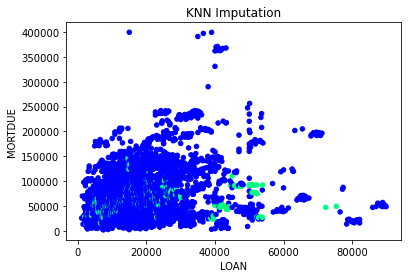

In [25]:
#Ploting graph to display replaced data
fig = plt.figure()
null_values = Data['MORTDUE'].isnull()
fig = Data_knnImputed.plot(x='LOAN',y='MORTDUE',kind='scatter',c=null_values,cmap='winter',title='KNN Imputation',colorbar=False)

The green represent the missing data which was replaced using KNN Imputer. it shows the distribution pattern of the missing data 

In [26]:
#Joining replaced numerical data with categorical data 
Df = Data_knnImputed.join(Data['JOB'])
Df = Df.join(Data['REASON'])
Df = Df.join(Data['BAD'])
Df

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB,REASON,BAD
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,Other,HomeImp,1.0
1,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,Other,HomeImp,1.0
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,Other,HomeImp,1.0
3,1700.0,97800.0,112000.0,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,NaN,NaN
4,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,Office,HomeImp,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5787,88900.0,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,Office,HomeImp,0.0
5788,89000.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,Other,DebtCon,0.0
5789,89200.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,Office,HomeImp,0.0
5790,89800.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,Self,HomeImp,0.0


In [27]:
#Dropping columns with empty values
Df = Df.dropna()

In [28]:
#Rechecking for missing data
Df.isnull().sum()

LOAN       0
MORTDUE    0
VALUE      0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
JOB        0
REASON     0
BAD        0
dtype: int64

In [29]:
#Re-validating data
Data = Df
Data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
count,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000,5348.000000
mean,19073.410621,73451.240886,102282.617616,8.922603,0.267165,0.495251,179.464421,1.189753,21.269035,0.200636
std,11514.953151,43885.000824,58612.221676,7.456872,0.819059,1.136056,83.886913,1.693760,10.106760,0.400513
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11400.000000,46471.700000,65772.750000,3.000000,0.000000,0.000000,116.039957,0.000000,15.000000,0.000000
50%,16700.000000,64775.500000,89235.500000,7.000000,0.000000,0.000000,173.202803,1.000000,20.000000,0.000000
75%,23900.000000,90781.750000,120132.250000,13.000000,0.000000,0.400000,229.811666,2.000000,26.000000,0.000000
max,89900.000000,399412.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,1.000000



#### DEALING WITH OUTLIERS

Kurtosis is used to measure whether our data is heavy-tailed or light-tailed relative to a normal distribution, A low kurtosis mean low outliears and a higher mean higher outliears. Kurtosis= >1 is too peaked and less than -1 is too flat

Skewness
Skewness -1 to -0.5 and 1 to 0.5 are normally Moderatly skewed -0.5 to 0.5 = approximately skewed Kurtosis= >1 is too peaked and less than -1 is too flat

In [30]:
#checking kurtosis values for each columns
print(Data.kurtosis())

LOAN        6.546136
MORTDUE     6.482046
VALUE      24.338644
YOJ         0.432171
DEROG      39.261315
DELINQ     21.789159
CLAGE       5.458044
NINQ       10.245993
CLNO        1.183034
BAD         0.236493
dtype: float64


Columns #VALUE,#DEROG,#DELINQ and #NINQ have higher kurtosis values which depict higher presence of outlier 

In [31]:
print(Data.skew())

LOAN       1.995263
MORTDUE    1.827741
VALUE      3.094837
YOJ        0.987232
DEROG      5.409895
DELINQ     3.780695
CLAGE      1.168820
NINQ       2.652232
CLNO       0.768139
BAD        1.495462
dtype: float64


#VALUE, #DERPG,#DELINQ,#NINQ are considered highly skewed therefore there are huge outliers 

In [32]:
#Checking for Data types
Data.dtypes

LOAN       float64
MORTDUE    float64
VALUE      float64
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
JOB         object
REASON      object
BAD        float64
dtype: object

## Exploratory Data Analysis (EDA)

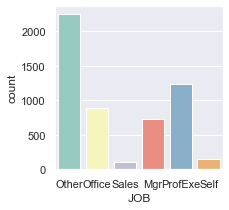

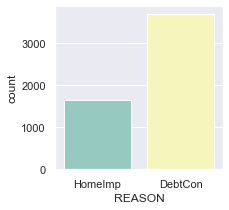

In [33]:
#Visualizations categorical variables
sns.set( rc = {'figure.figsize': (3, 3)})
categorical_variables = Data.select_dtypes(include = ['object'])

for column in categorical_variables.columns:
    plt.figure()
    sns.countplot(x=categorical_variables[column], data= categorical_variables, palette="Set3")
    plt.show()

Professional Executive job constitute the second largest loan applicate. People from other Jobs constitute the most

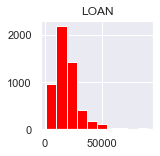

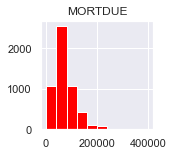

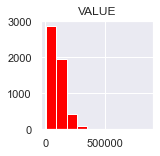

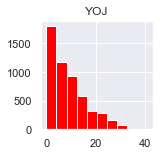

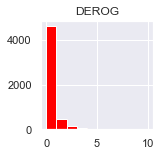

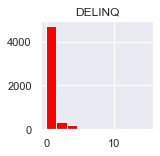

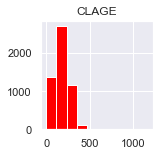

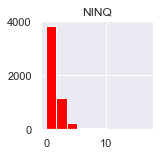

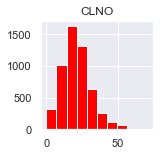

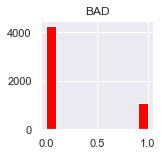

In [34]:
#Visualisation for numerical variables
sns.set( rc = {'figure.figsize': (2, 2)})

numerical_variables = categorical_variables = Data.select_dtypes(exclude= ['object'])
for column in numerical_variables:
    plt.figure()
    plt.hist(x= numerical_variables[column], color ='red')
    plt.title(column)
    plt.show()

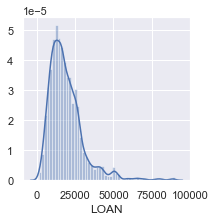

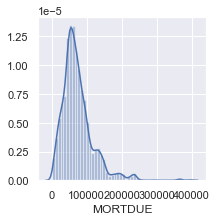

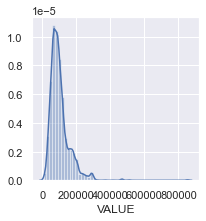

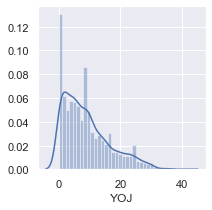

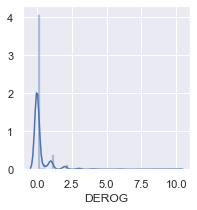

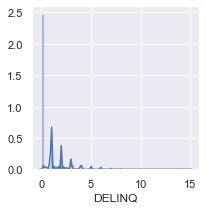

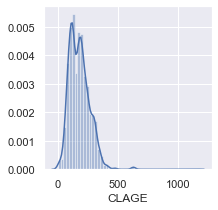

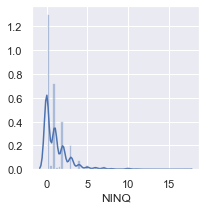

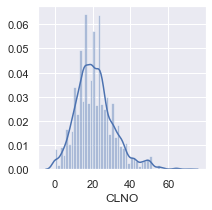

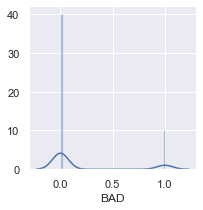

In [35]:
#Distributive plot Analysis for numerical variables
sns.set( rc = {'figure.figsize': (3, 3)})

for col in numerical_variables:
    plt.figure()
    x=numerical_variables[col]
    sns.distplot(x)
    plt.show()

All variables except #CLNO and #BAD exhibited a positive skewness.This gives an understanding that most of the loan requested are used for low expenditure stuffs like personal unlike business investment which require large capitals/ amounts.

##### ANALYSING LOAN AMOUNT VALUES

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


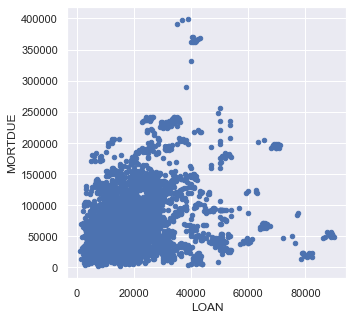

In [36]:
sns.set( rc = {'figure.figsize': (5, 5)})
Data.plot.scatter(x='LOAN', y='MORTDUE')

Interestingly amount due on current mortgate and the amount of loans requested has fairly a linear relationship;costumers with higher amount due on their mortgage are likely to request for larger loan amount

0.0    4275
1.0    1073
Name: BAD, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


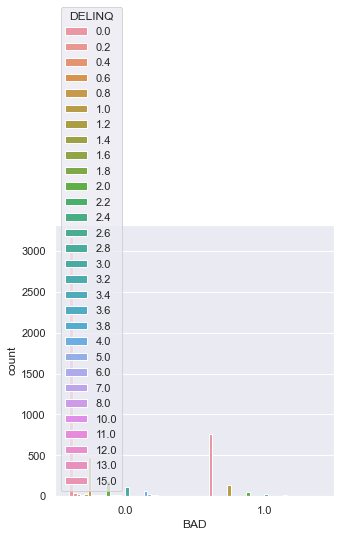

In [37]:
#Visualisation for #BAD ( Target variables) and #DELINQ
print(Data['BAD'].value_counts())
print(sns.countplot(x=Data['BAD'],hue = Data['DELINQ']))

AxesSubplot(0.125,0.125;0.775x0.755)


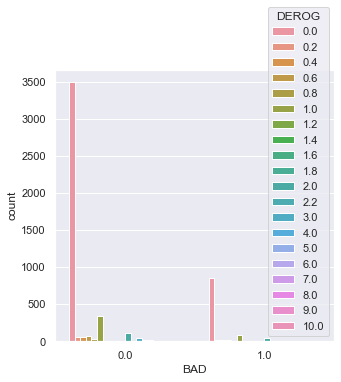

In [38]:
#Visualisation for #BAD and #DEROG analysis
print(sns.countplot(x=Data['BAD'],hue=Data['DEROG']))

AxesSubplot(0.125,0.125;0.775x0.755)


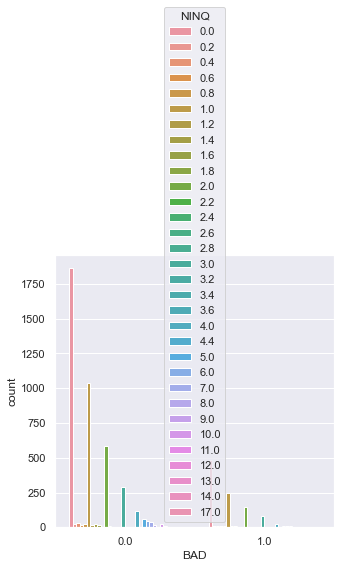

In [39]:
print(sns.countplot(x=Data['BAD'],hue=Data['NINQ']))

AxesSubplot(0.125,0.125;0.775x0.755)


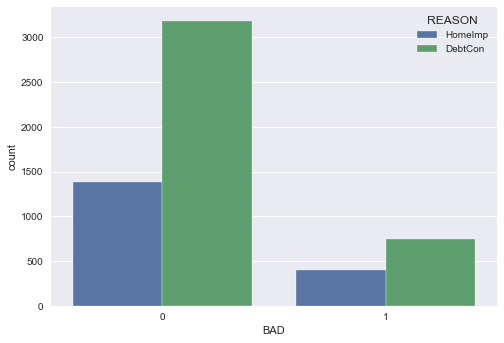

In [116]:
print(sns.countplot(x=Alt_Data['BAD'],hue=Alt_Data['REASON']))

AxesSubplot(0.125,0.125;0.775x0.755)


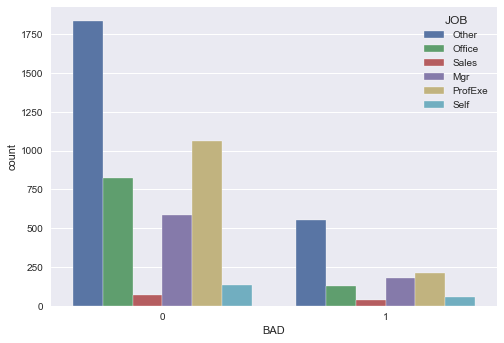

In [117]:
print(sns.countplot(x=Alt_Data['BAD'],hue=Alt_Data['JOB']))

Text(0.5, 1.0, 'BAD = 1')

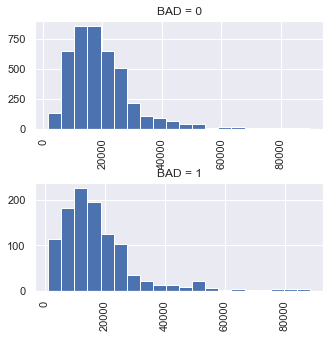

In [40]:
#Histogram Distribution LOAN STATUS
YOJ_hist = Data['LOAN'].hist(by=Data['BAD'], bins=20, layout=(2,1))
YOJ_hist[0].set_title('BAD = 0')
YOJ_hist[1].set_title('BAD = 1')

,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,1,0,0,1,0,0,0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,1.0
1,0,1,0,0,1,0,0,0,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,1.0
2,0,1,0,0,1,0,0,0,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,1.0
4,0,1,0,1,0,0,0,0,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,0.0
5,0,1,0,0,1,0,0,0,1800.0,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,0,1,0,1,0,0,0,0,88900.0,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,0.0
5788,1,0,0,0,1,0,0,0,89000.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,0.0
5789,0,1,0,1,0,0,0,0,89200.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,0.0
5790,0,1,0,0,0,0,0,1,89800.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,0.0


Few applicant defaulted their loans

### DEFAULTED LOAN ANALYSIS

In [41]:
Default_Data = Data[(Data['BAD']==1)]
Default_Data.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
count,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.000000,1073.0
mean,17227.027027,70661.041473,96655.673465,8.995871,0.313141,0.560485,172.284701,1.140727,20.585275,1.0
std,12690.553405,40900.440717,52710.219550,7.240169,0.930086,1.292864,79.397384,1.672135,9.901189,0.0
min,1100.000000,2063.000000,8800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9200.000000,45547.400000,62674.000000,3.800000,0.000000,0.000000,111.399385,0.000000,14.000000,1.0
50%,14700.000000,62264.000000,85298.000000,7.000000,0.000000,0.000000,164.315410,1.000000,19.800000,1.0
75%,21300.000000,88810.000000,115065.000000,13.000000,0.000000,1.000000,220.813290,2.000000,26.000000,1.0
max,88500.000000,363737.000000,469748.000000,41.000000,10.000000,15.000000,623.456209,14.000000,65.000000,1.0


One the average a person with USD70661 due on Mortgage,USD96656 value of current property, 9 years of Job experience,0.3 major derogatory report, 0.6 delinquent credit lines, 172 months of trade lines, one recent enquires and 21 credit lines is likely to default a loan with amount of USD17227 

In [42]:
RepaidData = Data[(Data['BAD']==0)]
RepaidData.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
count,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.000000,4275.0
mean,19536.842105,74151.564622,103694.947691,8.904213,0.255626,0.478877,181.266489,1.202058,21.440655,0.0
std,11154.244723,44579.904320,59925.341686,7.510999,0.788442,1.092729,84.890157,1.699116,10.151615,0.0
min,1700.000000,2619.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,12000.000000,46822.500000,66827.000000,3.000000,0.000000,0.000000,117.063074,0.000000,15.000000,0.0
50%,17200.000000,65303.000000,90008.000000,7.000000,0.000000,0.000000,173.961897,1.000000,20.000000,0.0
75%,24300.000000,91440.500000,121466.000000,13.000000,0.000000,0.400000,232.324439,2.000000,26.000000,0.0
max,89900.000000,399412.000000,855909.000000,41.000000,10.000000,13.000000,1168.233561,17.000000,71.000000,0.0


Text(0.5, 1.0, 'BAD = 1')

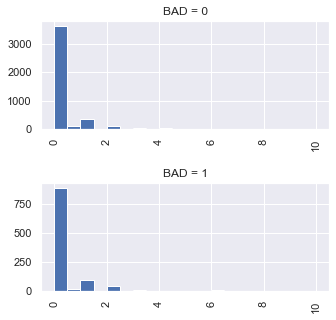

In [43]:
#Further analysis into #BAD and #YOG analysis
YOJ_hist = Data['DEROG'].hist(by=Data['BAD'], bins=20, layout=(2,1))
YOJ_hist[0].set_title('BAD = 0')
YOJ_hist[1].set_title('BAD = 1')

Text(0.5, 1.0, 'BAD = 1')

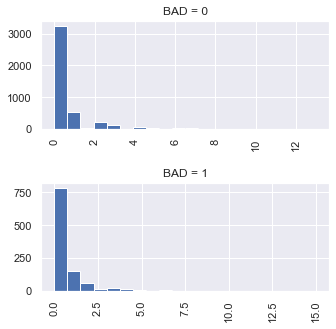

In [44]:
YOJ_hist = Data['DELINQ'].hist(by=Data['BAD'], bins=20, layout=(2,1))
YOJ_hist[0].set_title('BAD = 0')
YOJ_hist[1].set_title('BAD = 1')

Text(0.5, 1.0, 'BAD = 1')

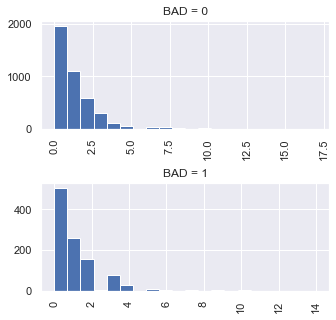

In [45]:
YOJ_hist = Data['NINQ'].hist(by=Data['BAD'], bins=20, layout=(2,1))
YOJ_hist[0].set_title('BAD = 0')
YOJ_hist[1].set_title('BAD = 1')

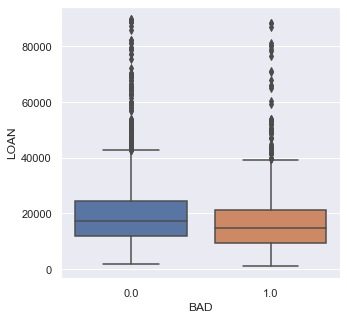

In [46]:
sns.boxplot(x=Data['BAD'],y=Data['LOAN'])

In [47]:
#Analysis of #YOG  +40
Data[Data['YOJ'] > 40]

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,JOB,REASON,BAD
1749,12300.0,77000.0,94000.0,41.0,0.0,4.0,212.866667,4.0,17.0,Other,HomeImp,1.0
3043,17000.0,74910.0,112375.0,41.0,0.0,0.0,95.200000,3.0,28.0,Mgr,DebtCon,0.0
3742,20200.0,82181.0,119535.0,41.0,0.0,0.0,105.219297,3.0,28.0,ProfExe,HomeImp,0.0


An interesting insight is how 2 out of 3 applicant with over 40 years work experience all defaulted their loans.They seems to have similer financial details except for the number of delinquentcredit lines whihc is higher(4) for repaid loan.

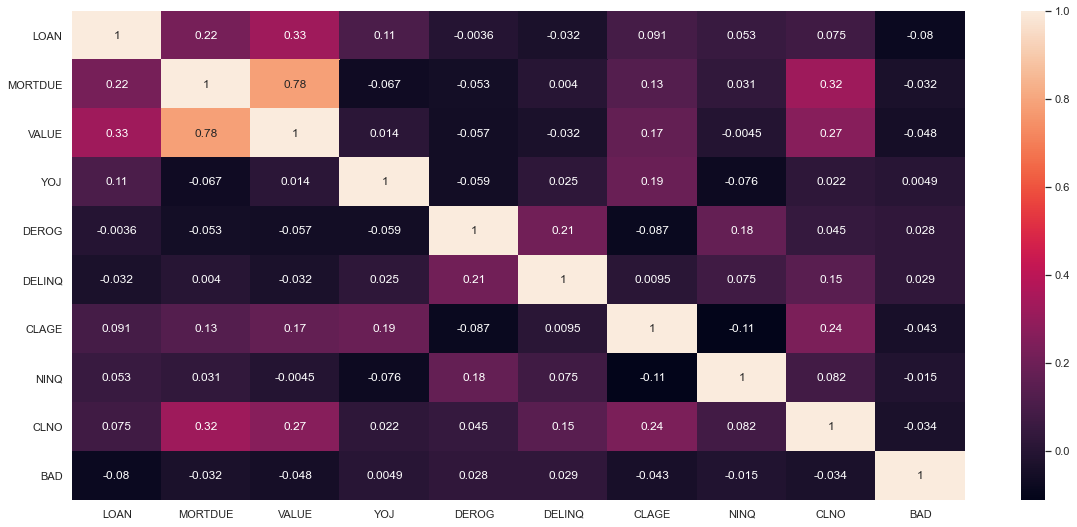

In [48]:
#Examine the relationship among the columns
corrmat = Data.corr()
fig, ax = plt.subplots(figsize=(20,9))
sns.heatmap(corrmat,vmax=1,annot=True)

From the correlations, Mortage Due and Value of property exhibit a strong relationship, costumer's with higher values for this columns are likely to repay their loan. 
Meanwhile higher values for Year of Work Experience, major derogatory report and delinquent credit lines are likely to lead to default of loan.

## Data Transformation

In [49]:
#Transforming #JOB into dummy variables
CatJOB = pd.get_dummies(Data['JOB'])
CatJOB.shape

(5348, 6)

In [50]:
# Transforming #REASON values into dummy variables 
CatREA = pd.get_dummies(Data['REASON'])
CatREA.shape

(5348, 2)

In [51]:
#Non Dummy Variables
non_dummy_Data = Data.drop(['JOB','REASON'], axis=1)
non_dummy_Data  

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,1.0
1,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,1.0
2,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,1.0
4,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,0.0
5,1800.0,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5787,88900.0,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,0.0
5788,89000.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,0.0
5789,89200.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,0.0
5790,89800.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,0.0


In [52]:
#Concatenating Both Dummy and non_Dummy variables
Data = pd.concat([CatREA,CatJOB,non_dummy_Data],axis=1)
Data.shape

(5348, 18)

In [53]:
Data

,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,1,0,0,1,0,0,0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,1.0
1,0,1,0,0,1,0,0,0,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,1.0
2,0,1,0,0,1,0,0,0,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,1.0
4,0,1,0,1,0,0,0,0,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,0.0
5,0,1,0,0,1,0,0,0,1800.0,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,0,1,0,1,0,0,0,0,88900.0,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,0.0
5788,1,0,0,0,1,0,0,0,89000.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,0.0
5789,0,1,0,1,0,0,0,0,89200.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,0.0
5790,0,1,0,0,0,0,0,1,89800.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,0.0


## MODEL BUILDING AND EVALUATION

The following models will be considered for this project and evaluated to select to find which one performed Best. After an extensive research The Random Forest Model, K-Nearest Neighbour and Support Vector Model were considered. The classical Logistic model was not considered because it will perform badly with the imperfect values in the target column.
Later on the best performing model will be test against modern machine learning XGBoost model.

In [54]:
#Importing metrics for evalutions
from sklearn.metrics import accuracy_score,precision_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate,cross_val_score
from sklearn.metrics import recall_score

In [55]:
y = Data['BAD'] #Target variable
X = Data.drop('BAD',axis=1) #Predicted variables

In [56]:
#Split and Shuffle
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 42,shuffle = True,stratify = y)

In [57]:
y_test.value_counts()

0.0    1283
1.0     322
Name: BAD, dtype: int64

The target variable has an imbalanced data set. the repaid(0) loan value is about four times the default loan(1) value. The default loan data are not enough for the model to learn and distinguish the two target values.
Logistic regression model will not be considered for this problem. The solution is to:
1. Gather more data on default loans
2. Pick other robust model to handle this dataset

I will consider the latter.

In [58]:
#Scaling varibales using StandardScaler 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

I used standard scaler to scaler all columns into one dimension for the model to train faster and easier.

### Random Forest Classifier Model

In [59]:
#Training Random Forest Classifier Model
Rr = RandomForestClassifier()
Rr.fit(X_train,y_train)

#Testing Random Forest Classifier Model model
y_pred = Rr.predict(X_test)

In [60]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.97      0.88      1283
         1.0       0.45      0.11      0.18       322

    accuracy                           0.80      1605
   macro avg       0.63      0.54      0.53      1605
weighted avg       0.74      0.80      0.74      1605



From the classification report, out all the customers the model predicted to default their loans, only 51% of them actually did default. 
Also, out of all the customers who defaulted their loans, the model actually recall just 11% of them.
with this problem i am more concerned about predicting customers likely this default loan 
But the model did worst at that with an f1 score of just 18%.

In [61]:
#Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,1241,42,1283
1.0,287,35,322
All,1528,77,1605


my priority is on false negative values. In summary the model is better at predicting customer who will repay loan that those who will default, but with this problem my focus is model that is excellent at predicting customers who will default loan.

In [62]:
#ROC-AUC
from sklearn.metrics import roc_curve
predictions_proba = Rr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,predictions_proba[:,1]))

0.6396462580423407


0.63 auc suggest suggest a poor performance by the RFC to predict which customers default or repay loans.

Let consider Hyper tuning some parameter of the Random Forest Classier with hope of increasing it performance (precision)

#### HYPER PARAMTER TUNING RANDOM FOREST CLASSIFIER

In [63]:
#Defining Paramters for hypertuning
RandomForestClassifier()
parameters = {
    'n_estimators' : [25, 50, 100, 150, 175 ],
    'criterion' : ['gini','entropy'],
    'max_features' : ['sqrt','log2', None],
    'max_depth' : [3, 6, 9],
    'max_leaf_nodes' : [3, 6, 9]
}

I considered both the Grid and Random Search to find which method produced best parameters.
First let start with the Grid Search Method

In [64]:
#Gird Search Method for best parameter
grid_search = GridSearchCV(RandomForestClassifier(),param_grid = parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       max_leaf_nodes=9, n_estimators=25)


Above is the best parameter combinations that yeild the best performance using the Grid Search Method.
I retrained the Random Forest Model with these parameters.

In [65]:
#Re_training model with Grid Search paramters
Grid_Rr = RandomForestClassifier(max_depth=6, max_features='sqrt', max_leaf_nodes=9,
                       n_estimators=50)
Grid_Rr.fit(X_train,y_train)
#Testing the Logistic regression model
y_pred_grid = Grid_Rr.predict(X_test)

#Model Evaluation
print(classification_report(y_test,y_pred_grid))

              precision    recall  f1-score   support

         0.0       0.81      0.99      0.89      1283
         1.0       0.72      0.07      0.13       322

    accuracy                           0.81      1605
   macro avg       0.76      0.53      0.51      1605
weighted avg       0.79      0.81      0.74      1605



After hyper tuning paramaters using the grid search method, the metric for precision increased but is not good enough, recall and f1-score reduce. The model performed slighty better than former but still not good enough. 

In [66]:
#ROC-AUC for Grid Parameters
Grid_predictions_proba = Grid_Rr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Grid_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Grid_predictions_proba[:,1]))
print('AUC score remained the same')

0.6302096696891505
AUC score remained the same


In [67]:
#Random Search Method for Best Paramter
random_search = RandomizedSearchCV(RandomForestClassifier(),parameters)
random_search.fit(X_train,y_train)
print(random_search.best_estimator_)

RandomForestClassifier(max_depth=9, max_features='log2', max_leaf_nodes=9)


Above is the best parameter combinations that yeild the best performance using the Random Search Method.
I retrained the Random Forest Model with these parameters.

In [68]:
#Retraining data with Random Search parameters
Rand_Rr = RandomForestClassifier(criterion='entropy', max_depth=9, max_features='sqrt',
                       max_leaf_nodes=9, n_estimators=150)
Rand_Rr.fit(X_train,y_train)
#Testing the Logistic regression model
y_pred_rand = Rand_Rr.predict(X_test)

#Model Evaluation
print(classification_report(y_test,y_pred_rand))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1283
         1.0       0.91      0.03      0.06       322

    accuracy                           0.80      1605
   macro avg       0.86      0.52      0.48      1605
weighted avg       0.83      0.80      0.72      1605



The model performed the best,precision increased from 68% to 88% of among customers who defaulted loan . But it still other metric still performed poor. 

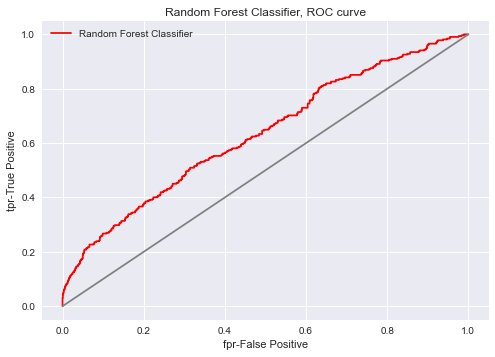

0.6326024021727028


In [69]:
#ROC-AUC for Grid Parameters
Rand_predictions_proba = Rand_Rr.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Rand_predictions_proba[:,1], pos_label= 1)

#roc cuurve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr,p_tpr, _ = roc_curve(y_test,random_probs, pos_label= 1)

plt.style.use('seaborn')
#Plot ROC AUC Cruve
plt.plot(fpr,tpr,color='red',label='Random Forest Classifier')
plt.plot(p_fpr,p_tpr,color='gray')
plt.xlabel('fpr-False Positive')
plt.ylabel('tpr-True Positive')
plt.legend(loc='best')
plt.title('Random Forest Classifier, ROC curve')
plt.show()
print(roc_auc_score(y_test,Rand_predictions_proba[:,1]))

In [70]:
#Confusion matrix
cnf_matrix = confusion_matrix(y_test,y_pred_rand)
pd.crosstab(y_test, y_pred_rand, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,1282,1,1283
1.0,312,10,322
All,1594,11,1605


In a nutshell, the Random Search produced the best parameters with better metric. The hyper tuned RFC model predicted few defauted loans but with high accuracy. 

#### K- Nearest Neighbors (KNN)

In [71]:
#importing KNN
from sklearn.neighbors import KNeighborsClassifier

In [72]:
#Training KNNis classifier model
KNN = KNeighborsClassifier()
KNN.fit(X_train,y_train)
#Testing the KNN Classifier model
KNN_y_pred = KNN.predict(X_test)

In [73]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,KNN_y_pred))

              precision    recall  f1-score   support

         0.0       0.81      0.94      0.87      1283
         1.0       0.30      0.10      0.15       322

    accuracy                           0.77      1605
   macro avg       0.55      0.52      0.51      1605
weighted avg       0.70      0.77      0.72      1605



In [74]:
#Confusion matrix for KNN Classifier model
cnf_matrix = confusion_matrix(y_test,KNN_y_pred)
pd.crosstab(y_test, KNN_y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,1210,73,1283
1.0,291,31,322
All,1501,104,1605


In [75]:
#ROC-AUC for Grid Parameters
KNN_predictions_proba = KNN.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, KNN_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,KNN_predictions_proba[:,1]))

0.5884366996993653


##### KNN HYPER PARAMETER TUNING

In [76]:
KNeighborsClassifier()
KNN_parameters = {
    'n_neighbors' : [2,5,7,10],
    'weights' : ['uniform','distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

###### Grid Search Approach

In [77]:
#Grid Search Method for best parameter
grid_search = GridSearchCV(KNeighborsClassifier(),param_grid = KNN_parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

KNeighborsClassifier(n_neighbors=10)


In [78]:
#Re_training model with Grid Search paramters
Grid_KNN = KNeighborsClassifier(n_neighbors = 10)
Grid_KNN.fit(X_train,y_train)
#Testing the Logistic regression model
Grid_y_pred = Grid_KNN.predict(X_test)

#Model Evaluation
print(classification_report(y_test,Grid_y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      1283
         1.0       0.47      0.04      0.08       322

    accuracy                           0.80      1605
   macro avg       0.64      0.52      0.48      1605
weighted avg       0.74      0.80      0.72      1605



In [79]:
#ROC-AUC for Grid Parameters
Grid_KNN_predictions_proba = Grid_KNN.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Grid_KNN_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Grid_KNN_predictions_proba[:,1]))

0.5790364198815857


###### Random Search Approach

In [80]:
#Random Search Method for Best Paramter
random_search = RandomizedSearchCV(KNeighborsClassifier(),KNN_parameters)
random_search.fit(X_train,y_train)
print(random_search.best_estimator_)

KNeighborsClassifier(n_neighbors=7)


In [81]:
#Retraining data with Random Search parameters
Rand_KNN = KNeighborsClassifier(algorithm='kd_tree', n_neighbors=10)
Rand_KNN.fit(X_train,y_train)
#Testing the Logistic regression model
Rand_y_pred = Rand_KNN.predict(X_test)

#Model Evaluation
print(classification_report(y_test,Rand_y_pred))

              precision    recall  f1-score   support

         0.0       0.80      0.99      0.89      1283
         1.0       0.47      0.04      0.08       322

    accuracy                           0.80      1605
   macro avg       0.64      0.52      0.48      1605
weighted avg       0.74      0.80      0.72      1605



In [82]:
#ROC-AUC for Random Parameters
Rand_KNN_predictions_proba = Rand_KNN.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Rand_KNN_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Rand_KNN_predictions_proba[:,1]))

0.5790364198815857


Metric for K-Nearest Neighbor Classifier are not impressive, the Random Forest Classifier model had better metrics. Overrall both model were worst predictors of loan defaultors. 

### Support Vector Classifier

In [83]:
#Importing Support Vector Classifier SVC
from sklearn.svm import SVC

In [84]:
#Training SVC model
Svc = SVC(probability=True)
Svc.fit(X_train,y_train)
#Testing the SVC model
Svc_predictions = Svc.predict(X_test)

In [85]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,Svc_predictions))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1283
         1.0       0.33      0.01      0.02       322

    accuracy                           0.80      1605
   macro avg       0.57      0.50      0.45      1605
weighted avg       0.71      0.80      0.71      1605



In [86]:
#Confusion matrix for KNN Classifier model
cnf_matrix = confusion_matrix(y_test,KNN_y_pred)
pd.crosstab(y_test,Svc_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0.0,1.0,All
True,,,
0.0,1277,6,1283
1.0,319,3,322
All,1596,9,1605


In [87]:
#ROC-AUC for Grid Parameters
Svc_predictions_proba = Svc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Svc_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Svc_predictions_proba[:,1]))

0.6005625402419601


### Support Vector Classsifer Hyper parameter tuning

In [88]:
SVC()
Svc_parameters = {
      'kernel' : ['poly', 'rbf', 'sigmoid'],
      'C' : [50, 10, 1.0, 0.1, 0.01],
      'gamma' : ['scale']
}

In [89]:
grid_search.estimator.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

###### Grid Search Approach

In [90]:
#Grid Search Method for best parameter
grid_search = GridSearchCV(SVC(probability=True),param_grid = Svc_parameters)
grid_search.fit(X_train,y_train)
print(grid_search.best_estimator_)

SVC(C=0.01, kernel='poly', probability=True)


In [91]:
#Re_training model with Grid Search paramters
Grid_Svc = SVC(decision_function_shape='ovo', probability=True)
Grid_Svc.fit(X_train,y_train)
#Testing the Logistic regression model
Grid_y_pred = Grid_Svc.predict(X_test)

#Model Evaluation
print(classification_report(y_test,Grid_y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1283
         1.0       0.33      0.01      0.02       322

    accuracy                           0.80      1605
   macro avg       0.57      0.50      0.45      1605
weighted avg       0.71      0.80      0.71      1605



In [92]:
#ROC-AUC for Grid Parameters
Grid_Svc_predictions_proba = Grid_Svc.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Grid_Svc_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Grid_Svc_predictions_proba[:,1]))

0.6005625402419601


###### Random Search Approach

In [93]:
#Random Search Method for Best Paramter
random_search = RandomizedSearchCV(SVC(),Svc_parameters)
random_search.fit(X_train,y_train)
print(random_search.best_estimator_)

SVC(C=0.01, kernel='poly')


In [94]:
#Retraining data with Random Search parameters
Rand_SVC = SVC(decision_function_shape='ovo',probability=True)
Rand_SVC.fit(X_train,y_train)
#Testing the Logistic regression model
Rand_y_pred = Rand_SVC.predict(X_test)

#Model Evaluation
print(classification_report(y_test,Rand_y_pred))

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1283
         1.0       0.33      0.01      0.02       322

    accuracy                           0.80      1605
   macro avg       0.57      0.50      0.45      1605
weighted avg       0.71      0.80      0.71      1605



In [95]:
#ROC-AUC for Grid Parameters
Rand_Svc_predictions_proba = Rand_SVC.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, Rand_Svc_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,Rand_Svc_predictions_proba[:,1]))

0.6005625402419601


### XGBOOST MODEL 

In [96]:
import xgboost as xgb

In [97]:
Data

,DebtCon,HomeImp,Mgr,Office,Other,ProfExe,Sales,Self,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,BAD
0,0,1,0,0,1,0,0,0,1100.0,25860.0,39025.0,10.5,0.0,0.0,94.366667,1.0,9.0,1.0
1,0,1,0,0,1,0,0,0,1300.0,70053.0,68400.0,7.0,0.0,2.0,121.833333,0.0,14.0,1.0
2,0,1,0,0,1,0,0,0,1500.0,13500.0,16700.0,4.0,0.0,0.0,149.466667,1.0,10.0,1.0
4,0,1,0,1,0,0,0,0,1700.0,30548.0,40320.0,9.0,0.0,0.0,101.466002,1.0,8.0,0.0
5,0,1,0,0,1,0,0,0,1800.0,48649.0,57037.0,5.0,3.0,2.0,77.100000,1.0,17.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5787,0,1,0,1,0,0,0,0,88900.0,57264.0,90185.0,16.0,0.0,0.0,221.808717,0.0,16.0,0.0
5788,1,0,0,0,1,0,0,0,89000.0,54576.0,92937.0,16.0,0.0,0.0,208.692070,0.0,15.0,0.0
5789,0,1,0,1,0,0,0,0,89200.0,54045.0,92924.0,15.0,0.0,0.0,212.279697,0.0,15.0,0.0
5790,0,1,0,0,0,0,0,1,89800.0,50370.0,91861.0,14.0,0.0,0.0,213.892709,0.0,16.0,0.0


In [98]:
X= Data.drop('BAD',axis=1)
y= Data[['BAD']]

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42, stratify = y)

XGB_Clf = xgb.XGBClassifier()
XGB_Clf.fit(X_train,y_train)

C:\Users\User\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[21:32:33] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
# Testing the XGBoost model with X_test
y_predictions = XGB_Clf.predict(X_test)

In [100]:
#Model Evaluation
print(classification_report(y_test,y_predictions))

              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      1069
         1.0       0.52      0.22      0.31       268

    accuracy                           0.80      1337
   macro avg       0.68      0.58      0.60      1337
weighted avg       0.77      0.80      0.77      1337



In [101]:
#ROC-AUC for Grid Parameters
XGB_predictions_proba = XGB_Clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test,XGB_predictions_proba[:,1], pos_label= 1)
print(roc_auc_score(y_test,XGB_predictions_proba[:,1]))

0.6642489144548539


In [103]:
from sklearn.pipeline import Pipeline

In [104]:
Pipe = Pipeline(steps = [('scaler',StandardScaler()),('model',XGB_Clf)])
Pipe.fit(X_train,y_train)

C:\Users\User\.conda\envs\tensorflow\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\User\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[17:29:15] WARNING: C:\Users\dev-admin\croot\xgboost-split_1675120659361\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, enable_categorical=False,
                               gamma=0, gpu_id=-1, importance_type=None,
                               interaction_constraints='',
                               learning_rate=0.300000012, max_delta_step=0,
                               max_depth=6, min_child_weight=1, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=4, num_parallel_tree=1, predictor='auto',
                               random_state=0, reg_alpha=0, reg_lambda=1,
                               scale_pos_weight=1, subsample=1,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None))])

In [109]:
y_pipe_pred = Pipe.predict(X_test)
Pipe.score(X_test,y_test)

0.8032909498878086

# FINAL SUBMISION

Data Quality
1. Data on Defautled loans is very few compared to Repaid Loans (1189 against 4771)
Empty values ocnsituted 5.60% (4004) of the entrie Dataset 
2. 1273 of missing Data were drop data dropped and 2731 replaced
3. Features with categorica values had only 5% of it values missing, they were dropped since were not enough to affect decision making.
4. Four Features contained lot of outliers, because they recorded high numbers for kurtsis and skewness
5. 90% of original data were used for trained


EDA:
1. Most of the loan requested are spends on low cost stuffs like personal needs unlike business investment which require large capitals/ amounts.
2. Costumers with higher amount due on their mortgage are likely to request for larger loan amount.
3. Costumer's with higher values for this Mortage due and Value of current property are likely to repay their loan. Meanwhile higher values for Years of Work Experience, major derogatory report and delinquent credit lines are likely to lead to default of loan.

Modeling:
Among the 4 selected models: Random Forest, K-Nearest Neighborhood, Support Vector adn XGBoost
1. Random forest has the hightes precision of 91 but score poorly on recall and f1 score
2. The XGBOOST had the highest AUC score of 66% ability to distinquish between target value. 
3. Overral the various model poorly in estimating defaulted loan but did well with repaid loan. This is due to inadequate data available for defautled loan

Recommendation; is to gather enough data on defaulted loan to build better models and gained deeper understanding. 